In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Data Gathering
train_data = pd.read_csv("D:/twitter_sentiment/twitter_training.csv")
validation_data = pd.read_csv("D:/twitter_sentiment/twitter_validation.csv")

In [3]:
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
train_data.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
# Data Understanding
print("Train Data Shape:", train_data.shape)
print("Validation Data Shape:", validation_data.shape)

Train Data Shape: (74681, 4)
Validation Data Shape: (999, 4)


In [8]:
# Displaying some samples from train and validation data
print("Train Data Samples:")
print(train_data.head())
print("\nValidation Data Samples:")
print(validation_data.head())

Train Data Samples:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

Validation Data Samples:
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, wh

In [9]:
# Data Cleaning
train_data.columns = ['id', 'topic', 'sentiment', 'text']
validation_data.columns = ['id', 'topic', 'sentiment', 'text']
train_data.dropna(inplace=True)
validation_data.dropna(inplace=True)

In [10]:
# Concatenating Train and Validation Data
full_data = pd.concat([train_data, validation_data])
print(full_data.dtypes)

# Data Preprocessing
# No specific preprocessing needed for this example

id            int64
topic        object
sentiment    object
text         object
dtype: object


In [11]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [12]:
# Applying sentiment analysis to each tweet
full_data['compound_score'] = full_data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [13]:
# Classify sentiment based on compound score
full_data['predicted_sentiment'] = full_data['compound_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


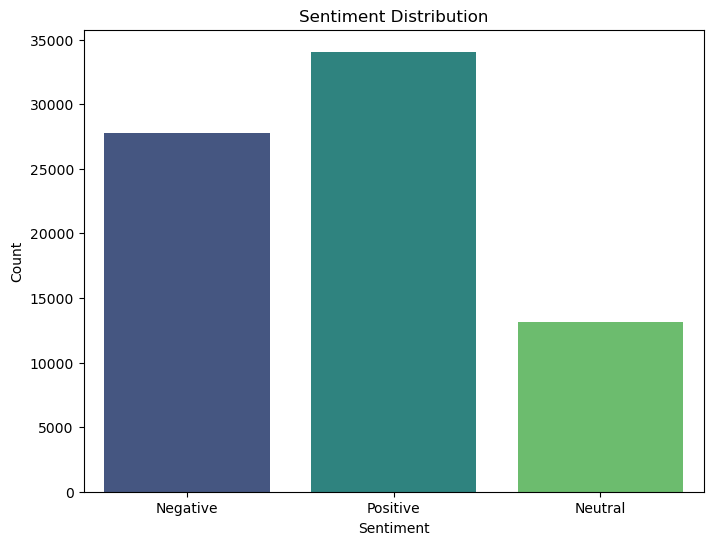

In [14]:
# Univariate Analysis
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='predicted_sentiment', data=full_data, palette="viridis")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


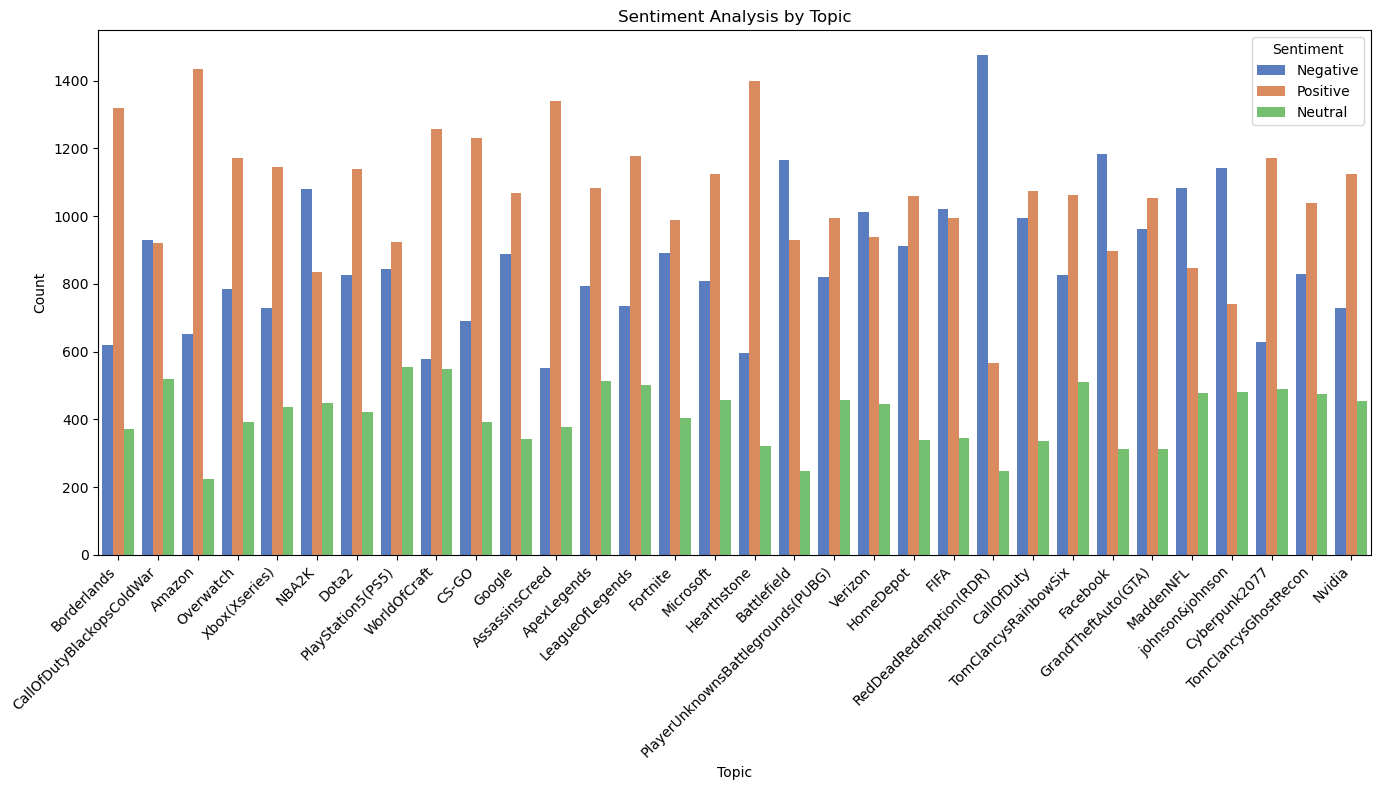

In [15]:
# Multivariate Analysis
# Analyze sentiment by topic
plt.figure(figsize=(14, 8))
sns.countplot(x='topic', hue='predicted_sentiment', data=full_data, palette="muted")
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Sentiment Analysis by Topic')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

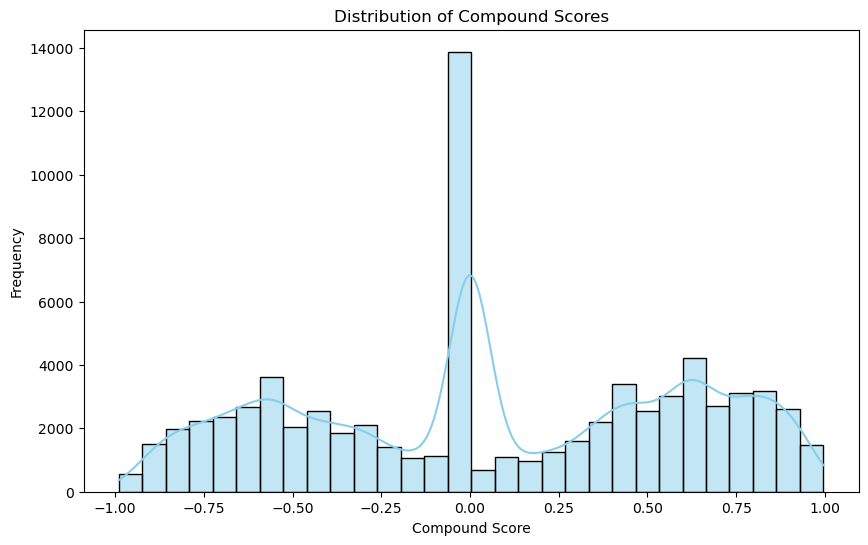

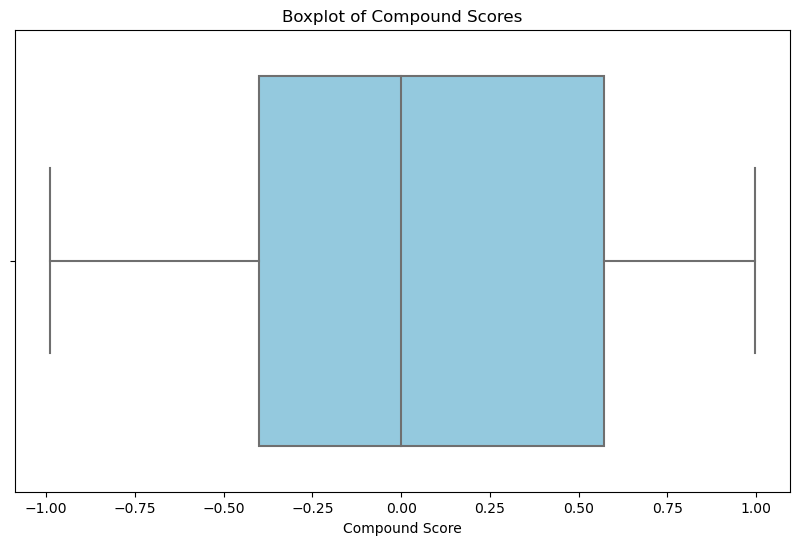

Number of outliers: 0


In [16]:
# Visualizing distribution of compound scores
plt.figure(figsize=(10, 6))
sns.histplot(data=full_data, x='compound_score', bins=30, kde=True, color='skyblue')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Scores')
plt.show()

# Visualizing outliers in compound scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_data, x='compound_score', color='skyblue')
plt.xlabel('Compound Score')
plt.title('Boxplot of Compound Scores')
plt.show()

# Identify outliers
Q1 = full_data['compound_score'].quantile(0.25)
Q3 = full_data['compound_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = full_data[(full_data['compound_score'] < lower_bound) | (full_data['compound_score'] > upper_bound)]
print("Number of outliers:", len(outliers))

# Removing outliers
full_data = full_data[(full_data['compound_score'] >= lower_bound) & (full_data['compound_score'] <= upper_bound)]


# Detecting outliers
# No outlier detection in this example

# Removing outliers
# No outlier removal in this example

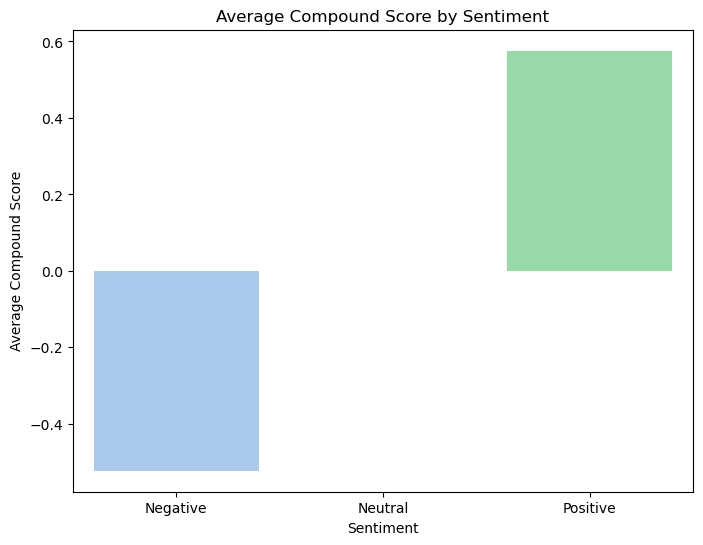

In [17]:
# Analyze average compound score by sentiment
avg_compound_by_sentiment = full_data.groupby('predicted_sentiment')['compound_score'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='predicted_sentiment', y='compound_score', data=avg_compound_by_sentiment, palette="pastel")
plt.xlabel('Sentiment')
plt.ylabel('Average Compound Score')
plt.title('Average Compound Score by Sentiment')
plt.show()

In [31]:
# Encode 'sentiment' column
full_data_encoded = pd.get_dummies(full_data, columns=['sentiment'], drop_first=True)

# Drop non-numeric columns
numeric_data = full_data_encoded.drop(columns=['id', 'topic', 'text'])

# Check for any remaining non-numeric values
non_numeric_values = numeric_data.select_dtypes(exclude=[np.number])
print(non_numeric_values.head())



  predicted_sentiment  sentiment_Negative  sentiment_Neutral  \
0            Negative               False              False   
1            Negative               False              False   
2            Negative               False              False   
3            Negative               False              False   
4            Negative               False              False   

   sentiment_Positive  
0                True  
1                True  
2                True  
3                True  
4                True  


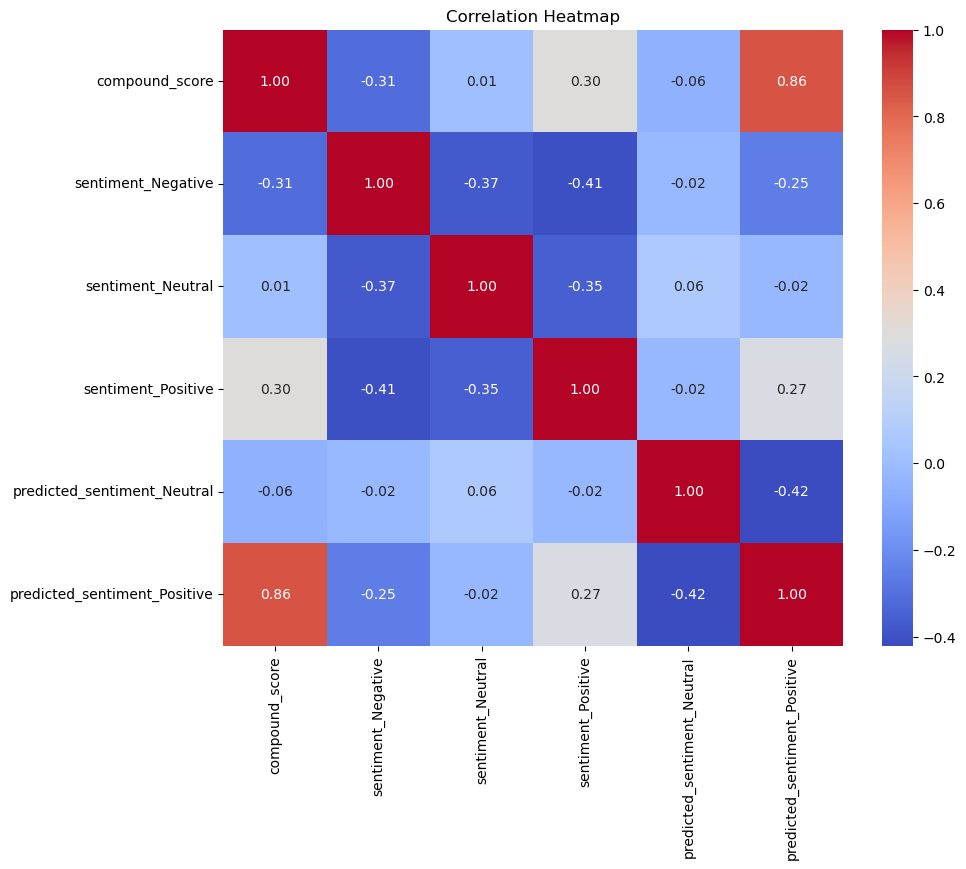

In [32]:
# Encode 'predicted_sentiment' column
full_data_encoded = pd.get_dummies(full_data, columns=['sentiment', 'predicted_sentiment'], drop_first=True)

# Drop non-numeric columns
numeric_data = full_data_encoded.drop(columns=['id', 'topic', 'text'])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



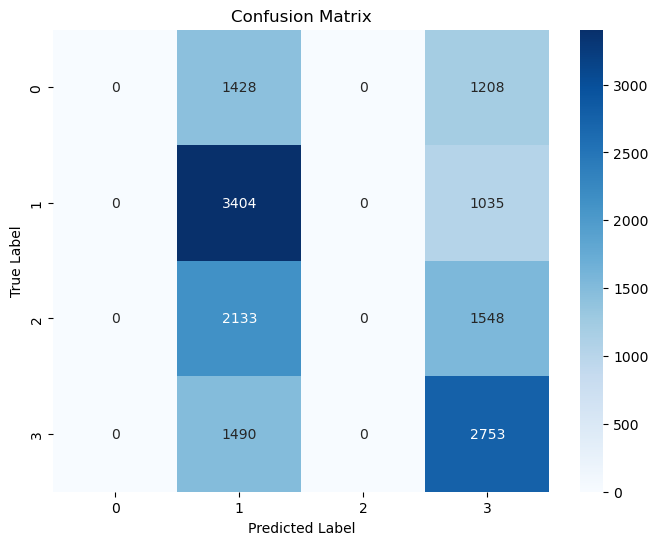

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       1.00      0.00      0.00      2636
    Negative       0.40      0.77      0.53      4439
     Neutral       1.00      0.00      0.00      3681
    Positive       0.42      0.65      0.51      4243

    accuracy                           0.41     14999
   macro avg       0.71      0.35      0.26     14999
weighted avg       0.66      0.41      0.30     14999



In [33]:
# Splitting data into features and target variable
X = full_data[['compound_score']]
y = full_data['sentiment']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on testing data
y_pred = model.predict(X_test)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
